In [1]:
%pylab inline
from champ.sim import multiXCGVF, multiXC

Populating the interactive namespace from numpy and matplotlib


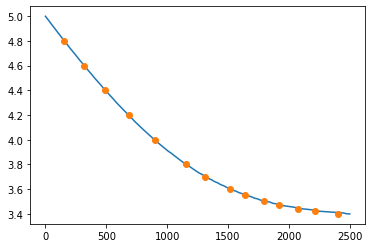

In [10]:
######################
####  GVF Solver #####
######################
ft_per_m = 3.28
bottom_width = 20./ft_per_m
height = 6./ft_per_m
Q_cfs = 400.
cumecs_per_cfs = 0.0283
Q = Q_cfs * cumecs_per_cfs
Manning_n = 0.025
g = 9.8 * ft_per_m
R_h_approx = 2.7 # feet
K = 1.5
f = 8*g*Manning_n**2/K**2/R_h_approx**(1/3)
L = 2500/ft_per_m

shape_dict = {'name': 'trapezoid', 'bottom_width':bottom_width, 'side_slope':2, 'height':height}
x = linspace(0,L, 100)
bed_slope = 0.0016
z = bed_slope * x
sim = multiXCGVF(x, z, shape_dict=shape_dict, n_mann=Manning_n, Q_w=Q)
sim.calc_flow(h0=5/ft_per_m)
plot(sim.x_arr*ft_per_m, sim.fd*ft_per_m)
x_chow = array([155,318,493,684,898,1155,1314,1515,1641,1797,1917,2075,2214,2401])
fd_chow = array([4.8, 4.6, 4.4, 4.2, 4, 3.8, 3.7, 3.6, 3.55, 3.5, 3.47, 3.44, 3.42, 3.4])
plot(x_chow, fd_chow, 'o')


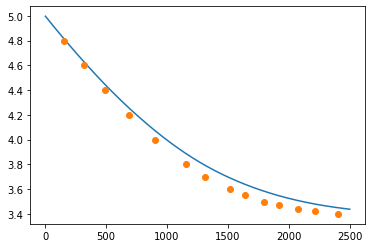

In [11]:
###########################
####  Original Solver #####
###########################
ft_per_m = 3.28
bottom_width = 20./ft_per_m
height = 6./ft_per_m
Q_cfs = 400.
cumecs_per_cfs = 0.0283
Q = Q_cfs * cumecs_per_cfs
Manning_n = 0.025
g = 9.8 * ft_per_m
R_h_approx = 2.7 # feet
K = 1.5
f = 8*g*Manning_n**2/K**2/R_h_approx**(1/3)
L = 2500/ft_per_m

shape_dict = {'name': 'trapezoid', 'bottom_width':bottom_width, 'side_slope':2, 'height':height}
x = linspace(0,L, 500)
bed_slope = 0.0016
z = bed_slope * x
sim_orig = multiXC(x, z, shape_dict=shape_dict, n_mann=Manning_n, Q_w=Q)
sim_orig.calc_flow(h0=5/ft_per_m)
xmids = (sim_orig.x_arr[1:] + sim_orig.x_arr[:-1])/2.
plot(xmids*ft_per_m, sim_orig.fd_mids*ft_per_m)
x_chow = array([155,318,493,684,898,1155,1314,1515,1641,1797,1917,2075,2214,2401])
fd_chow = array([4.8, 4.6, 4.4, 4.2, 4, 3.8, 3.7, 3.6, 3.55, 3.5, 3.47, 3.44, 3.42, 3.4])
plot(x_chow, fd_chow, 'o')


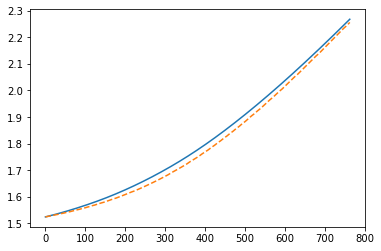

In [12]:
plot(sim_orig.x_arr, sim_orig.h)
plot(sim.x_arr, sim.h, '--')

In [3]:
n=1500
i=197
fd_guess = 1.1578651922678211

fds = linspace(0.99*fd_guess, 1.01*fd_guess, n)
res = []
res_abs = []
xc = sim.xcs[i]
h0 = sim.h[i]# 5/ft_per_m
A_down = xc.calcA(depth=h0)
P_down = xc.calcP(depth=h0)
D_H_down = 4 * A_down / P_down
V_down = Q / A_down
alpha = 1.1
V_head_down = alpha * V_down ** 2 / (2 * xc.g)
            
S_f_down = xc.f * V_down ** 2 / (2 * xc.g * D_H_down)
dx = sim.x_arr[i + 1] - sim.x_arr[i]
for fd in fds:
    res.append(sim.fd_residual(fd, i+1, h0, S_f_down, dx))
    res_abs.append(sim.fd_residual_abs(fd, i+1, h0, S_f_down, dx))

plot(fds, res)
plot(fds, res_abs)
#xlim([1,1.2])
#ylim([-.2,.1])

IndexError: list index out of range

In [4]:
from scipy.optimize import minimize_scalar
i=197
xc = sim.xcs[i]
h0 = sim.h[i]# 5/ft_per_m
A_down = xc.calcA(depth=h0)
P_down = xc.calcP(depth=h0)
D_H_down = 4 * A_down / P_down
V_down = Q / A_down
alpha = 1.1
V_head_down = alpha * V_down ** 2 / (2 * xc.g)
dx = sim.x_arr[i + 1] - sim.x_arr[i]
fd_guess = 1.1578651922678211
S_f_down = xc.f * V_down ** 2 / (2 * xc.g * D_H_down)
res = minimize_scalar(
                    sim.fd_residual_abs,
                    bracket=(0.5 * fd_guess, fd_guess),
                    args=(i + 1, h0, S_f_down, dx),
                )

In [5]:
res

     fun: 2.5715993778874235e-09
    nfev: 29
     nit: 25
 success: True
       x: 1.1093120886522092

In [4]:
plot(sim.x_arr*ft_per_m, sim.fd*ft_per_m)
x_chow = array([155,318,493,684,898,1155,1314,1515,1641,1797,1917,2075,2214,2401])
fd_chow = array([4.8, 4.6, 4.4, 4.2, 4, 3.8, 3.7, 3.6, 3.55, 3.5, 3.47, 3.44, 3.42, 3.4])
plot(x_chow, fd_chow, 'o')


AttributeError: 'multiXC' object has no attribute 'fd'

In [4]:
sim.xcs[-1].calcNormalFlowDepth(Q, bed_slope)*ft_per_m

3.3735898168045355

In [5]:
sim.xcs[-1].calcCritFlowDepth(Q)*ft_per_m

2.1648781443695433

In [3]:
1.157*ft_per_m

3.7949599999999997

In [16]:
xc = sim.xcs[1]
xc.abs_normal_discharge_residual(3.373589/ft_per_m, bed_slope, Q)

5.3669931290301065e-06

In [5]:
from scipy.interpolate import interp1d
f = interp1d(sim.x_arr*ft_per_m, sim.fd*ft_per_m)

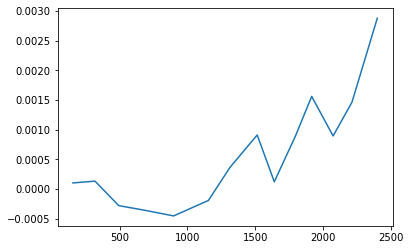

In [6]:
fd_mod = f(x_chow)

rel_err = (fd_mod - fd_chow)/fd_mod
plot(x_chow, rel_err)

In [9]:
fs = []
for xc in sim.xcs:
    fs.append(xc.f)
fs

[0.04779768656073045,
 0.047854523090260614,
 0.047854523090260614,
 0.04791168901208248,
 0.04796918784839909,
 0.0480270231755507,
 0.0480270231755507,
 0.048085198625093806,
 0.04814371788490634,
 0.04820258470032029,
 0.04820258470032029,
 0.048261802875282124,
 0.04832137627354215,
 0.04832137627354215,
 0.04838130881987336,
 0.0484416045013209,
 0.04850226736848299,
 0.04850226736848299,
 0.04856330153682414,
 0.048624711188021676,
 0.048624711188021676,
 0.0486865005713468,
 0.048748674005080754,
 0.048748674005080754,
 0.048811235877967686,
 0.04887419065070499,
 0.048937542857472344,
 0.048937542857472344,
 0.049001297107500785,
 0.0490654580866828,
 0.0490654580866828,
 0.049130030559225046,
 0.049195019369344714,
 0.049195019369344714,
 0.04926042944301109,
 0.04932626578973369,
 0.04932626578973369,
 0.04939253350439853,
 0.04939253350439853,
 0.04945923776915391,
 0.04952638385534741,
 0.04952638385534741,
 0.04959397712551583,
 0.049662023035429555,
 0.049662023035429555,

In [3]:
xc = sim.xcs[0]
xc5 = sim.xcs[5]
xc20 = sim.xcs[20]

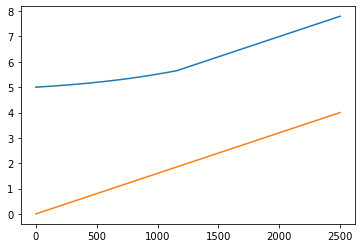

In [10]:
plot(sim.x_arr*ft_per_m, sim.h*ft_per_m)
plot(sim.x_arr*ft_per_m, sim.z_arr*ft_per_m)


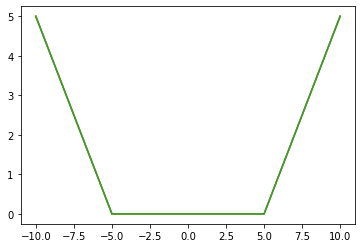

In [4]:
plot(xc.x, xc.y + sim.ymins[0])
plot(xc5.x, xc5.y)
plot(xc20.x, xc20.y)

In [12]:
sim.run_one_step()

In [5]:
sqrt(8)/1.5**2

1.257078722109418

In [6]:
2/0.25**(4/3)

12.699208415745595

In [7]:
(3.54/2.56)**(1/3) 
#Size of effect in friction slope from using
# only one f value to represent n.

1.1140921108647988

In [12]:
g = 9.8 * ft_per_m
R_h_approx = 2.7 # feet
K = 1.5
f = 8*g*Manning_n**2/K**2/R_h_approx**(1/3)
f

0.051297887908433246

In [25]:
np.size([1,2,3])

3

11/29/2022 - Created Chow test and now regular flow solver fails many tests because of use of f in flow calcs (at least calcNormalFlowDepth). Need for multiXC to initialize XC's correctly accounting for f or n_mann. Maybe create XC initialization function that can be inherited by multiXCGVF. Are the initialization processes similar enough to do this?